In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import glob,csv

from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
data=scipy.io.loadmat('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Pa_part.mat')
NEMO_dep=data['NEMO_dep']
Pa_diss=data['Pa_part']
lons=data['lons']
lats=data['lats']
Pa_ini=np.empty([149,182,31,1])

coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/coordinates*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

#Find variogram model

In [3]:
what=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
            #layer,distance,variance
whatt=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
x_all=np.empty([31,len(Pa_diss[0,:])])
            #layer,x,y
y_all=np.empty([31,len(Pa_diss[0,:])])
z_all=np.empty([31,len(Pa_diss[0,:])])
def find(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        
        x_ma=np.ma.masked_where(abs(x)<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(abs(y)<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(abs(z)<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)
        m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<55,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<55,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        woww=np.empty([len(xxx_dis),len(xxx_dis)])
        wow=np.empty([len(xxx_dis),len(xxx_dis)])
        c=np.average(zzz_ma)
        for k in range (len(xxx_dis)):
            for j in range (len(xxx_dis)):
                woww[k,j]=((xxx_dis[k]-xxx_dis[j])**2+(yyy_dis[k]-yyy_dis[j])**2)**0.5
                wow[k,j]=0.5*c*(zzz_ma[k]-zzz_ma[j])**2
                
        what[layer,:,:]=wow[:,:]
        whatt[layer,:,:]=woww[:,:]
        x_all[layer,:]=xxx_dis
        y_all[layer,:]=yyy_dis
        z_all[layer,:]=zzz_ma

In [4]:
for i in range (31):
    find(i)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 2.0691041868e-11
Nugget: 5.81290991559e-05 



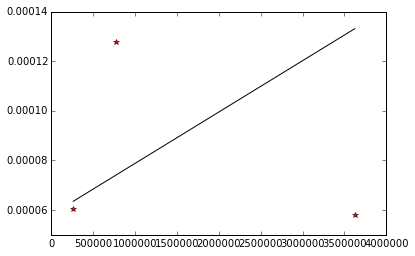

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:239: RuntimeWarning: invalid value encountered in sqrt
  sigma[n] = np.sqrt(ss_)
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:243: RuntimeWarning: divide by zero encountered in divide
  epsilon = delta/sigma


Calculating statistics on variogram model fit...
Q1 = nan
Q2 = nan
cR = nan 



/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:243: RuntimeWarning: invalid value encountered in divide
  epsilon = delta/sigma
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:257: RuntimeWarning: divide by zero encountered in log
  return Q2 * np.exp(np.sum(np.log(sigma**2))/sigma.shape[0])


In [5]:
OK = OrdinaryKriging(x_all,y_all, z_all, variogram_model='linear', verbose=True, enable_plotting=True)

In [6]:
'''Input slope and intercept'''

'Input slope and intercept'

In [12]:
slope=2.0691041868e-11
inter=5.81290991559e-05 

In [31]:
#write a function of  interpolation

def write_nc(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        x_ma=np.ma.masked_where(abs(x)<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(abs(y)<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(abs(z)<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)
        m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<55,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<55,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        #print ('zzz_ma %s'%zzz_ma)
        #print ('xxx_dis %s'%xxx_dis)
        #print ('yyy_dis %s'%yyy_dis)
        
        OK = OrdinaryKriging(xxx_dis,yyy_dis, zzz_ma, variogram_model='linear', verbose=False, enable_plotting=False)
        #OK.update_variogram_model('linear',variogram_parameters=[slope,inter],nlags=100,anisotropy_angle=0)
        OK.update_variogram_model('linear',variogram_parameters=None,nlags=4,anisotropy_angle=0)
        Pa_interp, ss = OK.execute('points',xx_lon, yy_lat)
        Pa_interp=Pa_interp.reshape(149,182)
        #print Pa_interp
        
        fig=plt.figure(figsize=(8, 8)); ax=plt.gca()
        m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
        m.drawcoastlines()
        m.fillcontinents(color = '0.95')
        m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x,y = m(nav_lon, nav_lat)
        plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
        CS = m.pcolor(x[115:-1,:],y[115:-1,:],Pa_interp[115:-1,:],cmap=plt.cm.YlOrBr)
        CBar = plt.colorbar(CS, shrink=0.8)
        #m.scatter(x[0,90],y[0,90],color='yellow',s=100)
        x_mma=x_ma.compressed()
        y_mma=y_ma.compressed()
        for j in range(len(x_mma)):
            x2,y2= m(x_mma[j], y_mma[j])
            cmm = plt.cm.get_cmap('YlOrBr')
            m.scatter(x2,y2,c=zzz_ma[j],vmin=np.min(Pa_interp),vmax=np.max(Pa_interp),cmap=cmm,s=80)
        #fig.savefig('fig%s.pdf'%layer)
        plt.title('Layer %s'%layer)
        
        Pa_ini[:,:,layer,-1]=Pa_interp
        plt.show()

#part Pa interpolation_result

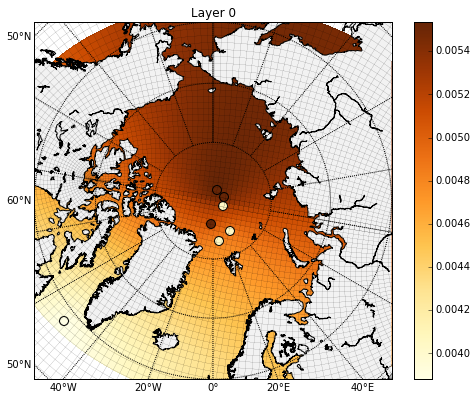

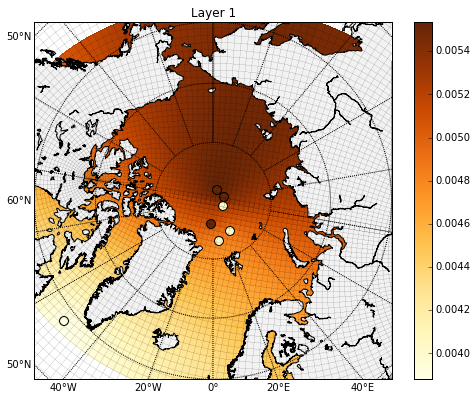

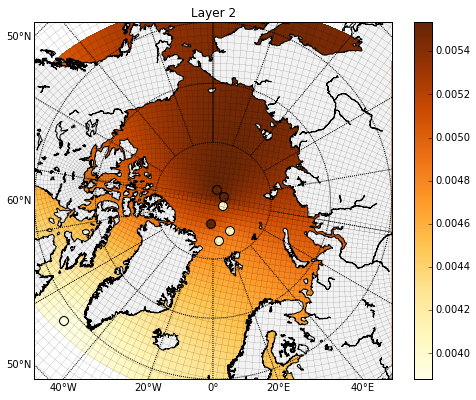

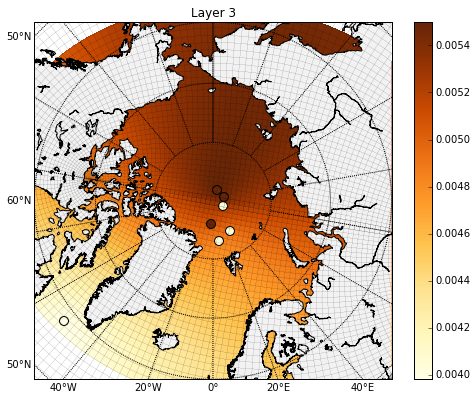

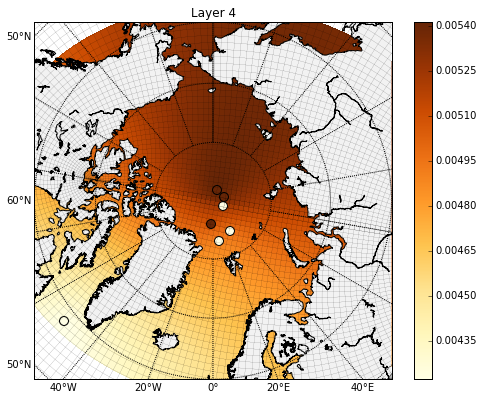

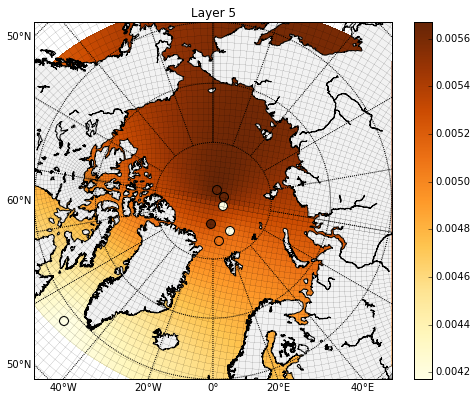

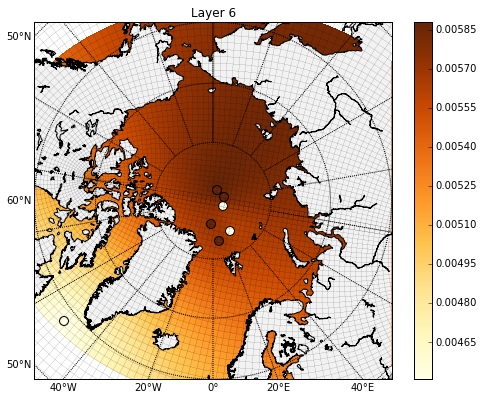

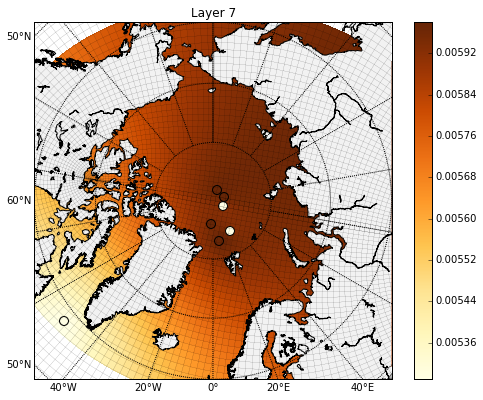

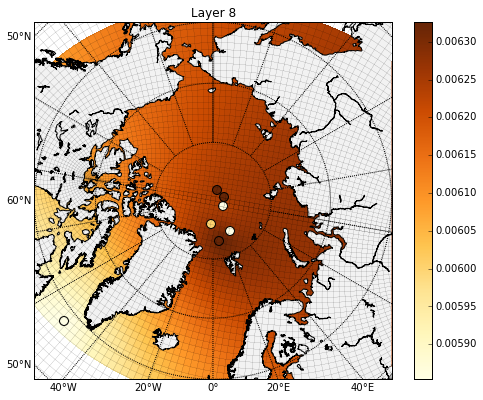

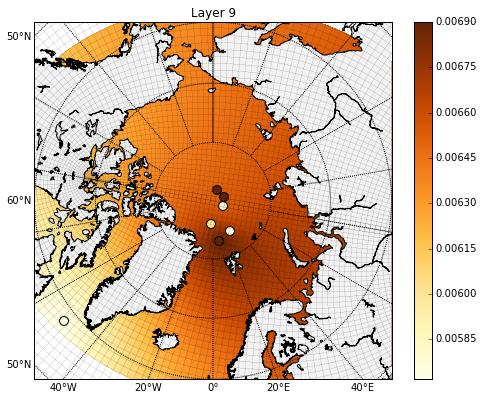

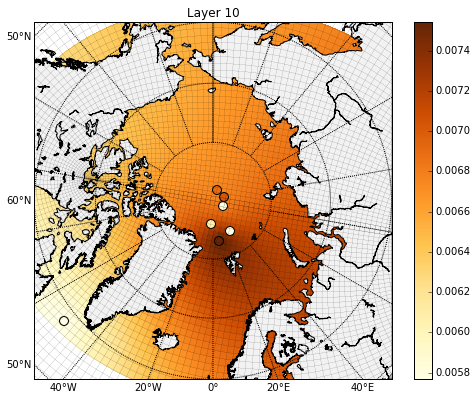

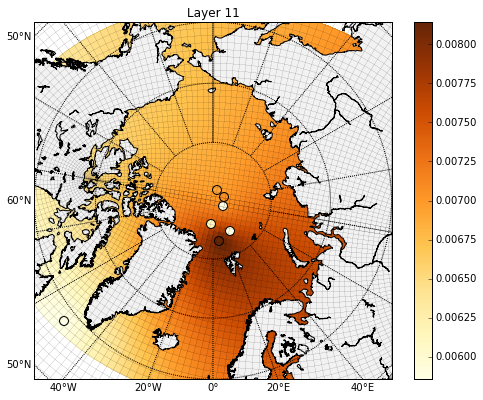

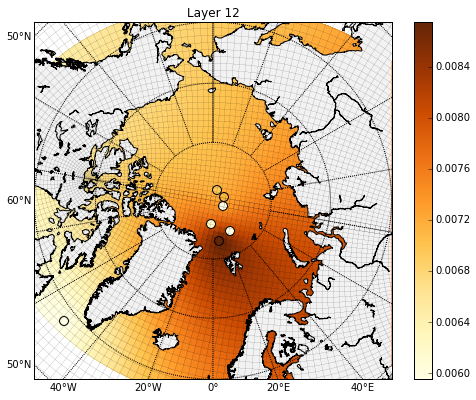

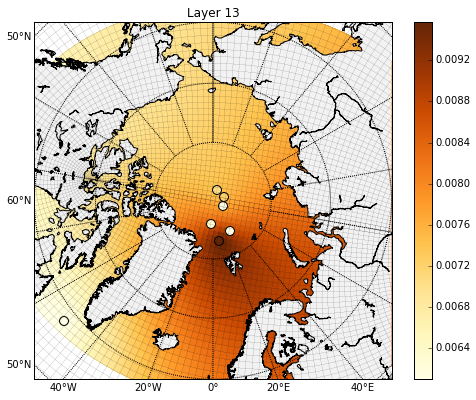

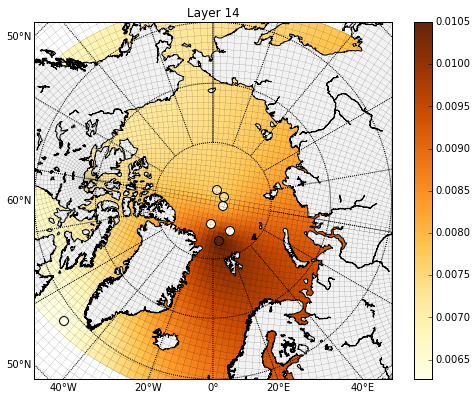

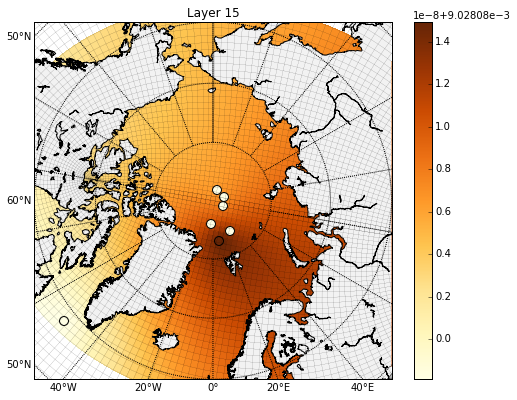

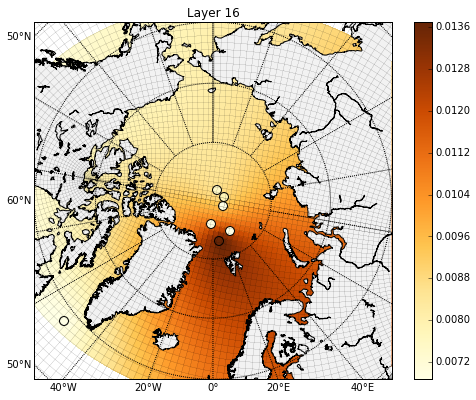

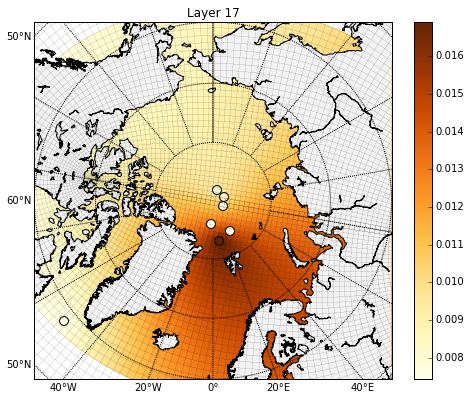

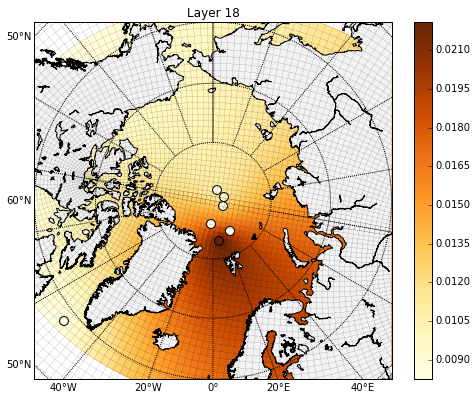

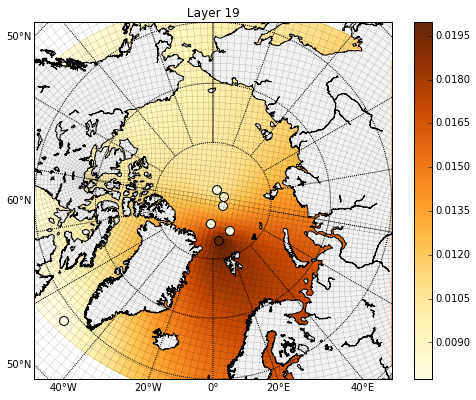

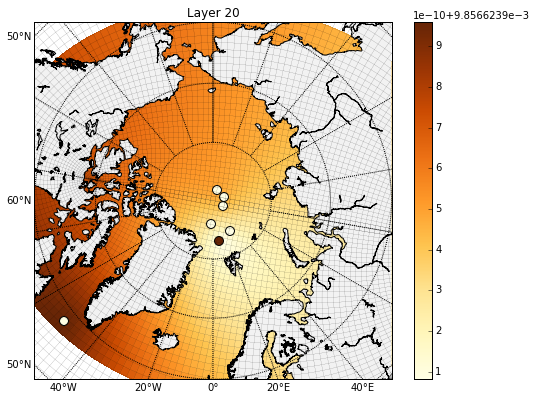

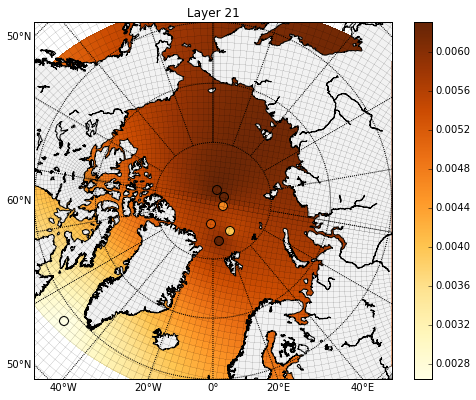

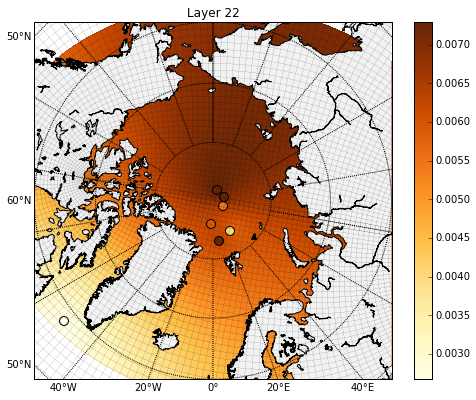

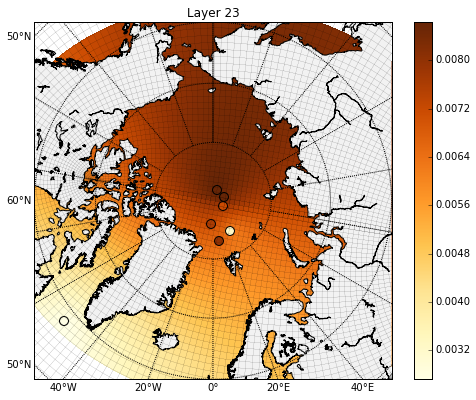

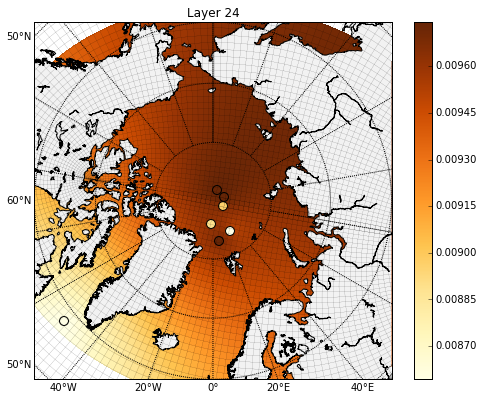

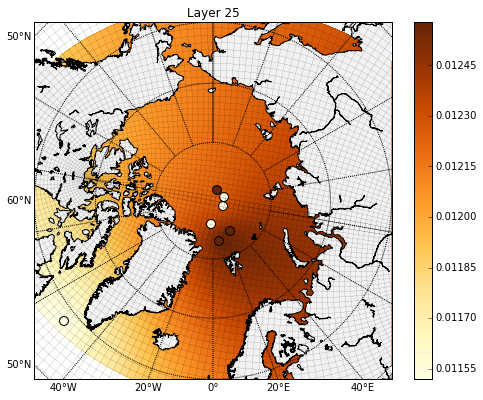

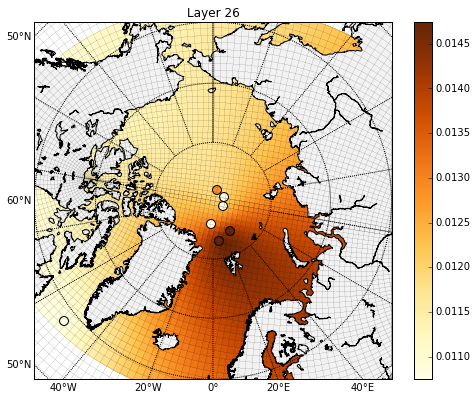

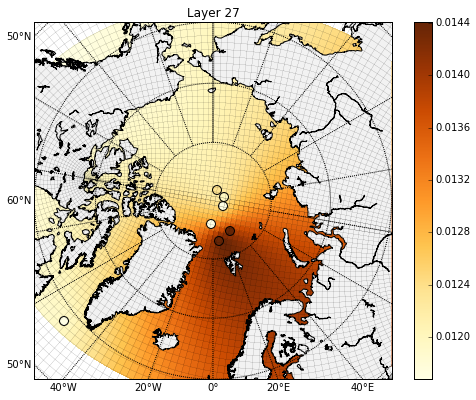

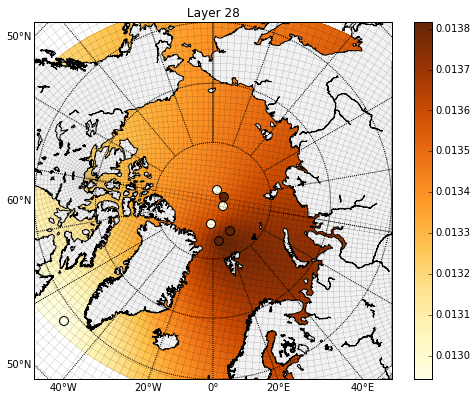

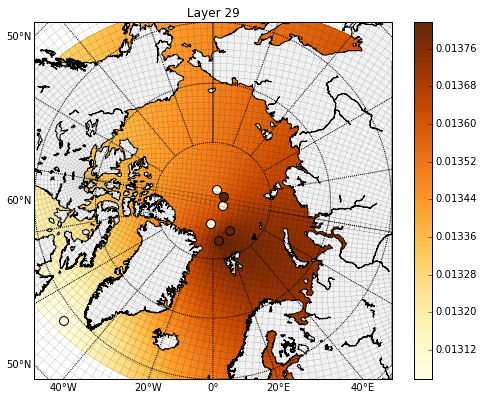

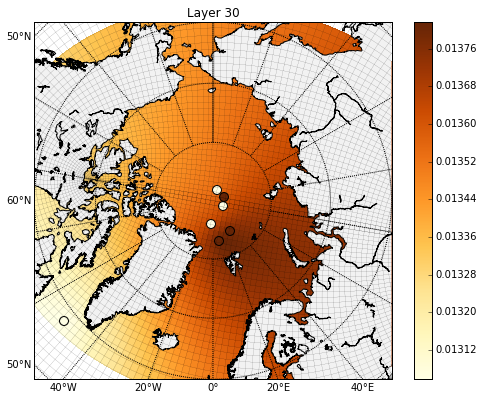

In [32]:
for i in range(31):
    write_nc(i)

#write the nc file

In [12]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]
depthtmax = NEMO_dep.shape[0]
print depthtmax
nemo = nc.Dataset('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/ORCA[initial]_Pa_part.nc', 'w')
nemo.description = 'Initial part. Pa value' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('deptht',depthtmax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('Pa_part', 'float32', ('time_counter','deptht','y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa=Pa_ini
nemo.close()

(149, 182)
31
